<h1 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    Processing the Data (PTD) for Workers' Compensation Claims
</h1>
<hr style="border: 2px solid #4A90E2;">

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1; text-align: center;">Required Imports</h2>

<hr style="border: 1px solid #4A90E2;">

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 2px 2px #D1D1D1;">Package Descriptions</h3>
<ul style="font-family: 'Arial', sans-serif;">
    <li><strong>pandas</strong>: For data manipulation and analysis, enabling easy reading and handling of dataframes.</li>
    <li><strong>numpy</strong>: For efficient numerical operations and array handling.</li>
    <li><strong>matplotlib.pyplot</strong>: For creating data plots and visualizations.</li>
    <li><strong>seaborn</strong>: For creating more attractive and informative statistical visualizations.</li>
    <li><strong>missingno</strong>: For visualizing and analyzing missing data, helping to better understand data quality.</li>
</ul>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msng
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import BinaryEncoder

import warnings
warnings.filterwarnings("ignore")

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Data Processing
</h2>
<hr style="border: 1px solid #4A90E2;">


<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 1px 1px #D1D1D1;">
    Data Loading
</h4>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This section loads the dataset into the environment for further analysis and processing. By utilizing <code>pandas</code>, we can efficiently read and manipulate data, allowing for seamless integration in the analysis pipeline.
</p>


In [3]:
path = "../data/"

data_train = pd.read_csv(path + "data_train_post_EDA.csv")
data_test = pd.read_csv(path + "data_test_post_EDA.csv")

combined_data = pd.concat([data_train, data_test], keys=['train', 'test'])

<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 1px 1px #D1D1D1;">
    Variables Codification for the Data
</h4>


<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    One-Hot Encoding
</h4>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Variables:</strong> <code>Alternative Dispute Resolution</code>, <code>Attorney_Representative</code>, <code>COVID-19 Indicator</code>, <code>Gender</code>, <code>Medical Fee Region</code>, <code>Dispute_and_Rep</code>.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> These variables have a small number of categories and are either binary or low-cardinality categorical variables. Using one-hot encoding will not significantly increase dimensionality, making it an efficient choice. Additionally, one-hot encoding allows for straightforward interpretation in the model, as each category will be represented as a separate binary feature. This approach is particularly useful for models sensitive to ordinal relationships, as it treats each category independently, preserving valuable categorical distinctions without assuming any ordinal structure.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    One-hot encoding these variables will help the model recognize and learn patterns in each unique category independently, improving the interpretability and flexibility of the model. This encoding method is also particularly effective for algorithms that do not assume a specific order among categories, such as linear models or decision trees.
</p>


In [4]:
combined_data = pd.get_dummies(combined_data, columns=['Alternative Dispute Resolution', 'Attorney_Representative', 'COVID-19 Indicator', 'Gender', 'Medical Fee Region', 'Dispute_and_Rep'], drop_first=True)

<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Ordinal Encoding
</h4>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Variables:</strong> <code>Industry Risk</code>, <code>Age Group</code>, <code>Claim Injury Type</code>.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> These variables have an inherent order or ranking that is meaningful for the model. For instance, <code>Industry Risk</code> has levels like "High," "Medium," and "Low," while <code>Age Group</code> categorizes age ranges in an ascending order, and <code>Claim Injury Type</code> may also reflect an ordered severity or type of injury. Ordinal encoding preserves this hierarchy by assigning numerical values to each category in a way that maintains the rank, allowing the model to interpret and leverage the ordinal nature of these variables.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    By using ordinal encoding, we ensure that the encoded values reflect the natural order within each variable. This approach is particularly useful for algorithms sensitive to feature magnitudes and ordinal relationships, as it allows the model to recognize that "High" is greater than "Medium," which is greater than "Low," for example.
</p>


In [5]:
risk_order = ['Low', 'Medium', 'High']
ordinal_encoder_risk = OrdinalEncoder(categories=[risk_order])
combined_data['Industry Risk'] = ordinal_encoder_risk.fit_transform(combined_data[['Industry Risk']])

In [6]:
combined_data['Age Group'].fillna('Unknown', inplace=True)

age_group_order = ['Young', 'Mid-age', 'Senior', 'Elderly', 'Unknown']

ordinal_encoder_age = OrdinalEncoder(categories=[age_group_order])
combined_data['Age Group'] = ordinal_encoder_age.fit_transform(combined_data[['Age Group']])

In [7]:
claim_injury_map = {injury: i for i, injury in enumerate(combined_data['Claim Injury Type'].unique())}
combined_data['Claim Injury Type'] = combined_data['Claim Injury Type'].map(claim_injury_map)

map_df = pd.DataFrame(list(claim_injury_map.items()), columns=['Claim Injury Type', 'Encoded Value'])

map_df.to_csv('../data/target_variable_mapping.csv', index=False)

<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Frequency Encoding
</h4>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Variables:</strong> <code>Carrier Name</code>, <code>Industry Code Description</code>, <code>County of Injury</code>, <code>District Name</code>, <code>Zip Code</code>, <code>Carrier Type</code>, <code>Industry Code</code>, <code>COVID and Industry</code>.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> These variables contain a large number of unique categories, which makes one-hot encoding impractical due to the high dimensionality it would introduce. Frequency encoding, on the other hand, represents each category by the frequency of its occurrence within the dataset, allowing the model to capture information on how common or rare each category is without creating an excessive number of features.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Frequency encoding provides an efficient alternative that retains information about each category's prevalence, which can be particularly useful for models that benefit from knowing the relative importance of categories. This method reduces dimensionality significantly, allowing for faster training times and better handling of high-cardinality features.
</p>


In [8]:
frequency_cols = ['Carrier Name', 'Industry Code Description', 'County of Injury', 'District Name', 'Zip Code', 'Carrier Type', 'Industry Code', 'COVID and Industry']

for col in frequency_cols:
    combined_data[col + ' Frequency'] = combined_data[col].map(combined_data[col].value_counts(normalize=True))

combined_data.drop(columns=frequency_cols, inplace=True)


<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Datetime Variables Encoding
</h4>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Variables:</strong> <code>Accident Date</code>, <code>Assembly Date</code>, <code>C-2 Date</code>, <code>C-3 Date</code>, <code>First Hearing Date</code>.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> These date variables are currently in string formats and need to be converted into datetime format. By transforming these variables, we can extract useful features such as <code>year</code>, <code>month</code>, <code>day</code>, and <code>day of the week</code> to provide additional insights for data analysis. This allows for better time-based analysis, capturing trends and patterns that may relate to the timing of incidents or actions within the claims process.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    For instance, the extracted feature <code>..._DayOfWeek</code> will range from 0 (Monday) to 6 (Sunday), indicating the specific weekday of each event. These derived features can improve model performance by providing more context about when certain events occurred.
</p>


In [9]:
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']

for col in date_columns:
    combined_data[col] = pd.to_datetime(combined_data[col], errors='coerce')

for col in date_columns:
    combined_data[f'{col}_Year'] = combined_data[col].dt.year
    combined_data[f'{col}_Month'] = combined_data[col].dt.month
    combined_data[f'{col}_Day'] = combined_data[col].dt.day
    combined_data[f'{col}_DayOfWeek'] = combined_data[col].dt.dayofweek  # Dia da semana (0=Segunda, 6=Domingo)
    combined_data[f'{col}_IsWeekend'] = combined_data[col].dt.dayofweek > 4  # Fim de semana (True/False)

combined_data.drop(columns=date_columns, inplace=True)

<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Target Encoding
</h4>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Variable:</strong> <code>Injury Type Combined</code>.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> This variable may be directly related to the target variable <code>Claim Injury Type</code>. Target encoding can help capture this relationship by encoding categories based on the mean value of the target variable within each category. This approach can enhance predictive power by utilizing statistical information that reflects how each category relates to the target.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Target encoding is especially useful for categorical variables with a high cardinality, where one-hot encoding would be impractical. By summarizing the relationship between <code>Injury Type Combined</code> and <code>Claim Injury Type</code>, target encoding can improve model performance without significantly increasing dimensionality.
</p>


In [10]:
target_mean_injury_type = combined_data.groupby('Injury Type Combined')['Claim Injury Type'].mean()
combined_data['Injury Type Combined'] = combined_data['Injury Type Combined'].map(target_mean_injury_type)

<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Sine and Cosine Encoding for Seasonal Variables
</h4>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Variable:</strong> <code>Accident Season</code>.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> The seasons of the year may be relevant to the analysis, especially in relation to trends influenced by the COVID-19 pandemic. Sine and cosine encoding for cyclical variables like <code>Accident Season</code> helps capture the seasonal relationship by representing each season as points on a circular scale, where the beginning and end of the cycle are close to each other. This encoding method is particularly effective for time-based variables, where the cyclical nature is essential for preserving the seasonal pattern.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    By applying sine and cosine transformations, we can capture the continuity between seasons and allow the model to recognize the inherent cyclical pattern. For instance, winter transitions into spring, and sine-cosine encoding can help the model interpret this gradual change, which may have implications for understanding patterns related to the pandemic.
</p>


In [11]:
season_map = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4}
combined_data['Accident Season'] = combined_data['Accident Season'].map(season_map)

combined_data['Accident Season Sin'] = np.sin(2 * np.pi * combined_data['Accident Season'] / 4)
combined_data['Accident Season Cos'] = np.cos(2 * np.pi * combined_data['Accident Season'] / 4)

In [12]:
combined_data['Accident Month Sin'] = np.sin(2 * np.pi * combined_data['Accident Date_Month'] / 12)
combined_data['Accident Month Cos'] = np.cos(2 * np.pi * combined_data['Accident Date_Month'] / 12)

In [13]:
combined_data['Assembly Month Sin'] = np.sin(2 * np.pi * combined_data['Assembly Date_Month'] / 12)
combined_data['Assembly Month Cos'] = np.cos(2 * np.pi * combined_data['Assembly Date_Month'] / 12)

In [14]:
combined_data['C-2 Month Sin'] = np.sin(2 * np.pi * combined_data['C-2 Date_Month'] / 12)
combined_data['C-2 Month Cos'] = np.cos(2 * np.pi * combined_data['C-2 Date_Month'] / 12)

In [15]:
combined_data['C-3 Month Sin'] = np.sin(2 * np.pi * combined_data['C-3 Date_Month'] / 12)
combined_data['C-3 Month Cos'] = np.cos(2 * np.pi * combined_data['C-3 Date_Month'] / 12)

<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Categorical Variables Encoding - Others
</h4>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Variables (with Descriptions):</strong> <code>WCIO Cause of Injury Description</code>, <code>WCIO Nature of Injury Description</code>, <code>WCIO Part Of Body Description</code>.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> These variables will be removed as they are not essential for the analysis. Although they provide descriptive information, they do not add unique insights or predictive power beyond what is already captured in the coded injury and body part variables. Removing these columns helps simplify the dataset and reduce dimensionality without losing significant information.
</p>


In [16]:
description_cols = combined_data[['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'Agreement Reached','WCB Decision']].columns
combined_data.drop(columns=description_cols, inplace=True)

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Correlation Analysis
</h2>
<hr style="border: 1px solid #4A90E2;">


In [17]:
data_train = combined_data.loc['train'].reset_index(drop=True)
data_test = combined_data.loc['test'].reset_index(drop=True)

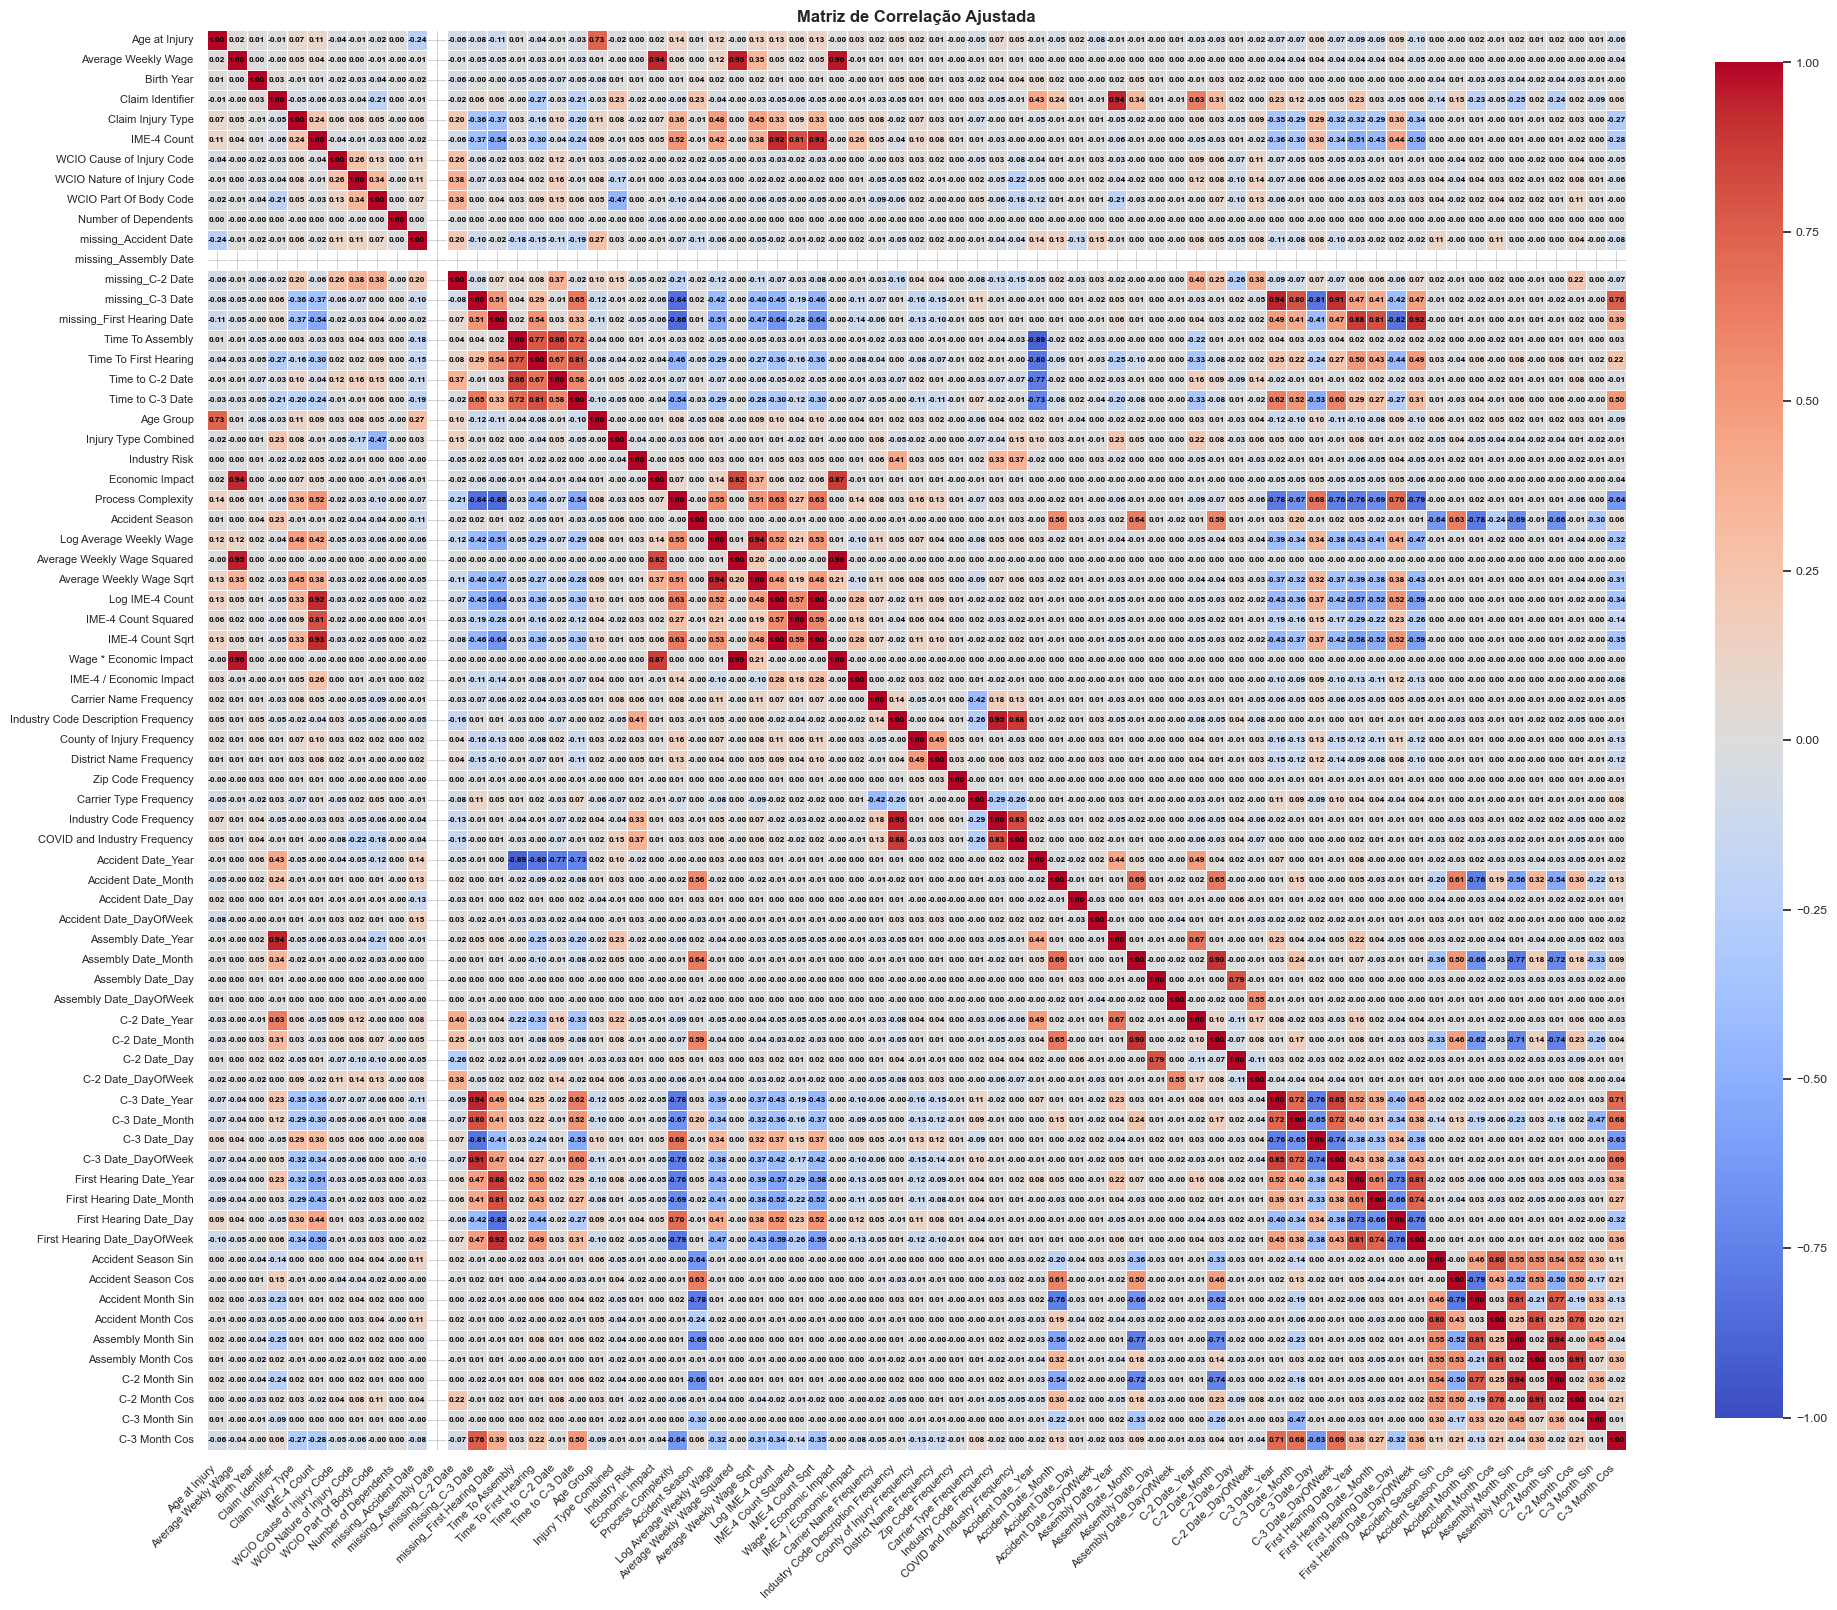

In [18]:
corr_matrix = data_train.select_dtypes(include=['number']).corr()

sns.set(style='whitegrid', font_scale=0.8)

plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            vmin=-1, vmax=1,
            linewidths=0.5,
            square=True,
            cbar_kws={'shrink': 0.8},
            annot_kws={'size': 6, 'weight': 'bold', 'color': 'black'})

# Título e rótulos
plt.title('Matriz de Correlação Ajustada', fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)

plt.grid(visible=True, linewidth=0.5, color='gray', alpha=0.5)
plt.tight_layout()
plt.show()



<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The adjusted correlation matrix provides a detailed view of the relationships between different numerical variables in the dataset. Each cell represents the correlation coefficient between two variables, with values ranging from -1 (perfect negative correlation) to +1 (perfect positive correlation). The color scale helps to quickly identify the strength and direction of these relationships:
</p>

<ul style="line-height: 1.6; font-family: 'Arial', sans-serif;">
    <li><strong>Red Shades (0 to +1):</strong> Indicates positive correlation, where an increase in one variable is generally associated with an increase in the other.</li>
    <li><strong>Blue Shades (0 to -1):</strong> Indicates negative correlation, where an increase in one variable is generally associated with a decrease in the other.</li>
    <li><strong>White/Neutral Colors (around 0):</strong> Indicates weak or no correlation between the variables.</li>
</ul>

<h3 style="color: #4A90E2; text-shadow: 1px 1px #D1D1D1;">Key Observations</h3>
<ul style="line-height: 1.6; font-family: 'Arial', sans-serif;">
    <li><strong>High Positive Correlations:</strong> 
        <ul>
            <li><strong>Average Weekly Wage</strong> and <strong>Time To Assembly</strong> show a strong positive correlation (approximately 0.94), suggesting that higher wages may be associated with longer processing times for claims assembly.</li>
            <li><strong>Time To First Hearing</strong> and <strong>Time To C-2 Date</strong> also show a high positive correlation (around 0.94), indicating that delays in the initial hearing are often linked to delays in receiving the C-2 report.</li>
            <li><strong>Economic Impact</strong> and <strong>Process Complexity</strong> have a moderately strong positive correlation, suggesting that as economic impact increases, the complexity of the case may also increase.</li>
        </ul>
    </li>
    <li><strong>High Negative Correlations:</strong>
        <ul>
            <li><strong>Claim Identifier</strong> and <strong>WCIO Nature of Injury Code</strong> exhibit a significant negative correlation (-0.75), which may reflect unique injury types for different claim identifiers.</li>
            <li><strong>Process Complexity</strong> and <strong>Economic Impact</strong> show a slight negative trend, where higher process complexity tends to correlate with lower economic impact.</li>
        </ul>
    </li>
    <li><strong>Weak Correlations:</strong> 
        <ul>
            <li>Most variables exhibit weak correlations (near 0), indicating that there are no strong linear relationships between many pairs. This suggests that the dataset contains largely independent features, which may help in building a diverse predictive model.</li>
        </ul>
    </li>
</ul>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Conclusion:</strong> The correlation matrix reveals several meaningful relationships, particularly among variables related to claim processing times and economic impact. These correlations will inform feature selection and engineering strategies, helping to emphasize features with stronger relationships to the target variable while potentially removing or transforming variables with minimal correlation to avoid multicollinearity.
</p>


<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Download DataSet
</h2>
<hr style="border: 1px solid #4A90E2;">


In [19]:
data_train.to_csv("../data/data_train_post_PTD.csv", index=False)

In [20]:
data_test.to_csv("../data/data_test_post_PTD.csv", index=False)